# <center> M3202C - Modélisations mathématiques <br> Projet 1 - Simulation probabiliste </center>
<center> 2019/2020 - A. RIDARD </center>

In [2]:
# importation des modules
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt

**Remarque :** 
- Pour calculer les lois de probabilité (pmf ou pdf) et les fonctions de répartition (cdf), on utilisera scipy.stats (sps)
- Pour simuler des réalisations de variable aléatoire, on préfèrera numpy.random (npr)

## Lois usuelles finies : le point de vue théorique

Dans cette partie, nous allons représenter graphiquement les trois lois usuelles finies vues en cours (M3102).

### Loi uniforme (sps.randint) sur $\{1,...,6\}$

/home/rozenn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


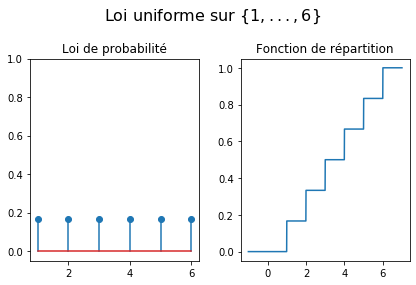

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.tight_layout(rect = [0, 0, 1, 0.85])
plt.suptitle('Loi uniforme sur $\{1,...,6\}$', fontsize=16)

ax1.set_title('Loi de probabilité')
ax1.set_ylim(-0.05, 1)
a = 1
b = 6
x = np.arange(a,b+1)
y = sps.randint.pmf(x, a, b+1)
ax1.stem(x, y)

ax2.set_title('Fonction de répartition')
x = np.linspace(-1, b+1, int(1e3))
y = sps.randint.cdf(x, a, b+1)
ax2.plot(x, y)

plt.show()

### Loi de Bernoulli (sps.bernoulli) de paramètre $p = 0.3$

/home/rozenn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


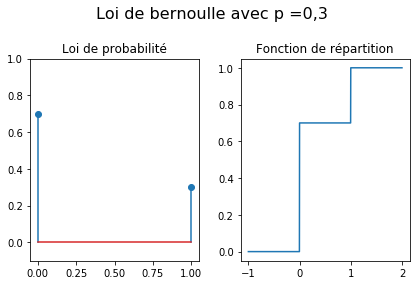

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.tight_layout(rect = [0, 0, 1, 0.85])
plt.suptitle('Loi de bernoulle avec p =0,3', fontsize=16)

ax1.set_title('Loi de probabilité')
ax1.set_ylim(-0.1, 1)
p = 0.3
x = np.arange(0,2)
y = sps.bernoulli.pmf(x, p)
ax1.stem(x, y)

ax2.set_title('Fonction de répartition')
x = np.linspace(-1, 2, int(1e3))
y = sps.bernoulli.cdf(x, p)
ax2.plot(x, y)

plt.show()

### Loi binomiale (sps.binom) de paramètres $n = 20$ et $p = 0.3$

/home/rozenn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


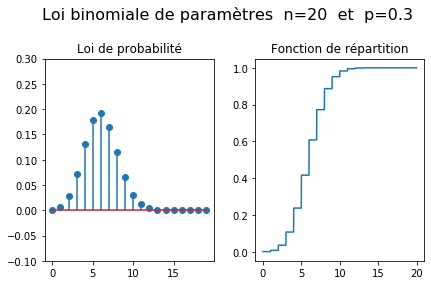

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.tight_layout(rect = [0, 0, 1, 0.85])
plt.suptitle('Loi binomiale de paramètres  n=20  et  p=0.3', fontsize=16)

ax1.set_title('Loi de probabilité')
ax1.set_ylim(-0.1, 0.3)
p = 0.3
n = 20
x = np.arange(0,20)
y = sps. binom.pmf(x, n, p)
ax1.stem(x, y)

ax2.set_title('Fonction de répartition')
p = 0.3
n = 20
x = np.linspace(0, 20, int(1e3))
y = sps.binom.cdf(x, n, p)
ax2.plot(x, y)

plt.show()

## Lois usuelles finies : le point de vue empirique

Dans cette partie, nous allons effectuer nos premières simulations pour approcher les espérances vues en cours.

### Utilisation des générateurs fournis par numpy.random (npr)

> Pour chacune des lois suivantes :
- Simuler 100 réalisations à l'aide du générateur adapté
- Calculer la moyenne de ces 100 valeurs
- Comparer cette moyenne empirique avec la moyenne théorique (espérance) vue en cours

**Loi uniforme (npr.randint) sur $\{1,...,6\}$**

In [6]:
tab = npr.randint(1,6,100)
total = 0
for valeur in tab:
    total = total + valeur
me = total/100
mt = (1+6)/2
print('moyenne empirique : '+ str(me))
print('moyenne théorique: '+ str(mt))

moyenne empirique : 3.06
moyenne théorique: 3.5


**Loi de Bernoulli (npr.binomial) de paramètre $p = 0.3$**

In [7]:
tab = npr.binomial(1,0.3,100)
total = 0
for valeur in tab:
    total = total + valeur
me = total/100
mt = 0.3
print('moyenne empirique : '+ str(me))
print('moyenne théorique: '+ str(mt))

moyenne empirique : 0.31
moyenne théorique: 0.3


**Loi binomiale (npr.binomial) de paramètres $n = 20$ et $p = 0.3$**

In [8]:
tab = npr.binomial(20,0.3,100)
total = 0
for valeur in tab:
    total = total + valeur
me = total/100
mt = 20*0.3
print('moyenne empirique : '+ str(me))
print('moyenne théorique: '+ str(mt))

moyenne empirique : 5.97
moyenne théorique: 6.0


### Définition de nos propres générateurs à partir de celui de la loi uniforme sur [0,1[ (npr.rand)

**Loi uniforme sur $\{1,...,6\}$**

> 
- A l'aide de **npr.rand**, définir une fonction **myRandint** qui génère un nombre aléatoirement (selon la loi considérée)<br>
- Simuler 100 réalisations à l'aide de ce générateur
- Comparer la moyenne empirique avec la moyenne théorique

In [9]:

def myRandint(min, max):
    valeur = (int)(min +(npr.rand(1))* ((max-min)+1))
    return valeur

total = 0
i = 0
while ( i<100):
    aleatoire = myRandint(1, 6)
    total = total + aleatoire
    i=i+1
me = total/100
mt = (1+6)/2
print('moyenne empirique : '+ str(me))
print('moyenne théorique: '+ str(mt))

moyenne empirique : 3.45
moyenne théorique: 3.5


**Loi de Bernoulli de paramètre $p = 0.3$**

> 
- A l'aide de **npr.rand**, définir une fonction **myBernoulli** qui génère un nombre aléatoirement (selon la loi considérée)<br>
- Simuler 100 réalisations à l'aide de ce générateur
- Comparer la moyenne empirique avec la moyenne théorique

In [10]:

def myBernoulli(p):
    #1 avec la probabilité p (0 ≤ p ≤ 1) et 0 avec la probabilité q = 1 – p.
    recherche = npr.rand(1)
    valeur = 1
    if (recherche<0.7):
        valeur = 0
    return valeur
total = 0
i = 0
while ( i<100):
    aleatoire = myBernoulli(0.3)
    total = total+ aleatoire
    i=i+1
me = total/100
mt = 0.3
print('moyenne empirique : '+ str(me))
print('moyenne théorique: '+ str(mt))


moyenne empirique : 0.27
moyenne théorique: 0.3


**Loi binomiale de paramètres $n = 20$ et $p = 0.3$**

> 
- A l'aide de *myBernoulli*, définir une fonction **myBinomial** qui génère un nombre aléatoirement (selon la loi considérée)<br>
- Simuler 100 réalisations à l'aide de ce générateur
- Comparer la moyenne empirique avec la moyenne théorique

In [11]:
def myBinomial(n,p):
    j=0
    valeur = 0
    while (j<n):
        essai = myBernoulli(p)
        if(essai == 1):
            valeur = valeur+1
        j= j+1
    return valeur

total = 0
i = 0
while ( i<100):
    aleatoire = myBinomial(20, 0.3)
    total = total + aleatoire
    i= i+1
me = total/100
mt = 0.3*20
print('moyenne empirique : '+ str(me))
print('moyenne théorique: '+ str(mt))


moyenne empirique : 5.89
moyenne théorique: 6.0


**Remarque :** on peut en fait simuler toutes les lois usuelles, même les lois continues, à l'aide de la seule loi uniforme sur [0,1[ !

## Loi Forte des Grands Nombres

Nous avons observé, pour trois lois usuelles finies, que la moyenne empirique (pour 100 réalisations) était proche de la moyenne théorique.<br>
En fait, ce résultat se généralise au travers du théorème de la Loi Forte des Grands Nombres (LFGN).

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
**Théorème (LFGN) :**<br>

Soit $X_i$ des v.a. indépendantes et de même loi (éventuellement inconnue) d'espérance $m$.<br />
Alors, la moyenne empirique converge (presque sûrement) vers la moyenne théorique :
$$\bar X_n=\displaystyle\frac{1}{n}\sum_{i=1}^{n}X_i\xrightarrow[n\to+\infty]{(p.s.)}m$$

*En pratique, on considère que la moyenne empirique (pour $n$ assez grand) est proche de la moyenne théorique*

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

> Ecrire un script permettant d'illustrer ce théorème de la manière suivante, par exemple avec les $X_i$ de loi uniforme sur [0,1[. 
<img src="LFGN.png" width="400">

Text(0.5, 1.0, 'Loi forte des grand nombre')

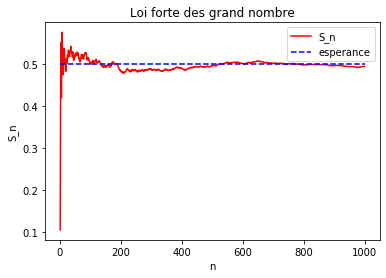

In [12]:

n=int(1e3)
S=np.cumsum(np.random.rand(n))/np.arange(1,n+1)
plt.plot(range(1,n+1),S,'r',label="S_n")
plt.plot((1,n),(.5,.5),"b--",label="esperance")
plt.ylabel('S_n')
plt.xlabel("n")
plt.legend(loc='best')
plt.title('Loi forte des grand nombre')

**Remarque :** si les $X_i\sim \mathcal B(p)$, alors la LFGN légitime l'approximation d'une probabilité par une fréquence empirique ! 

> Justifier cette remarque

Si l'on reprend ce que l'on afait precedament, la moyenne actualiser avec les Xi qui suivent la loie de bernouilli de parametre p alors plus le nombre de lancer est grand plus la probabilité est approvher par la frequence empirique


## Applications de la LFGN

### Résoudre un problème probabiliste par la simulation

> Résoudre par simulation le problème de Monty Hall (cf. cours), autrement dit :
- Simuler un grand nombre de "parties" (disons 100) avec les deux stratégies possibles.<br>
*Pour chacune des stratégies, on notera 1 si la partie est gagnée et 0 sinon*
- Calculer alors, pour chacune des stratégies, la fréquence empirique des parties gagnées.<br>
*Souvenez-vous, elle doit être proche de $\frac{2}{3}$ lorsque le joueur décide de changer d'avis, et proche de $\frac{1}{3}$ sinon.*

### Approcher une loi théorique par sa loi empirique

**Dans le cas discret**

/home/rozenn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/home/rozenn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


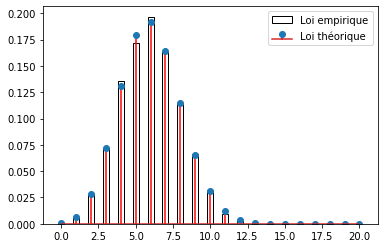

In [13]:
# paramètres de la binomiale
n, p = 20, 0.3 

# loi théorique
x = np.arange(n+1)
yTh = sps.binom.pmf(x, n, p)
plt.stem(x, yTh, 'r', label='Loi théorique')

# loi empirique
N = int(1e4)
yEmp = npr.binomial(n, p ,N)
plt.hist(yEmp, bins=n+1, normed=1, range=(-0.5,n+0.5), rwidth=0.4, edgecolor='black', color='white', label='Loi empirique')

plt.legend()
plt.show()

> Ecrire un script permettant de vérifier vos fonctions myRandint, myBernoulli et myBinomial.

/home/rozenn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/rozenn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


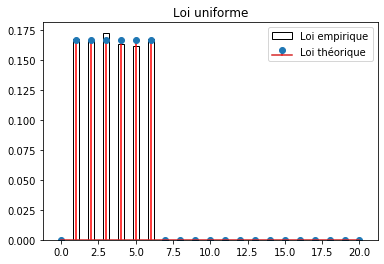

/home/rozenn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/rozenn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


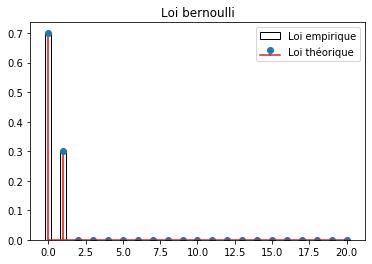

/home/rozenn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/rozenn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


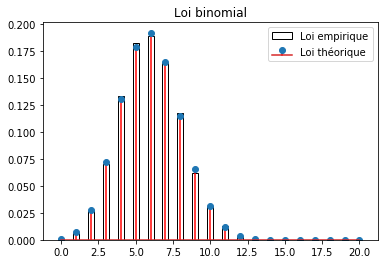

In [14]:
# myRandint
# paramètres de bernouille
a , b = 1 , 6

# loi théorique
x = np.arange(n+1)
yTh = sps.randint.pmf(x, a, b+1)
plt.stem(x, yTh, 'r', label='Loi théorique')

# loi empirique
N = int(1e4)
i=0
tab= N*[0]
while (i<N):
    tab[i] = myRandint(a,b)
    i= i+1
    
yEmp = tab
plt.hist(yEmp, bins=n+1, normed=1, range=(-0.5,n+0.5), rwidth=0.4, edgecolor='black', color='white', label='Loi empirique')
plt.legend()
plt.title('Loi uniforme')
plt.show()

#myBernoulli
# paramètres de bernouille
p = 0.3 

# loi théorique
x = np.arange(n+1)
yTh = sps.bernoulli.pmf(x, p)
plt.stem(x, yTh, 'r', label='Loi théorique')

# loi empirique
N = int(1e4)
i=0
tab= N*[0]
while (i<N):
    tab[i] = myBernoulli(p)
    i= i+1
    
yEmp = tab
plt.hist(yEmp, bins=n+1, normed=1, range=(-0.5,n+0.5), rwidth=0.4, edgecolor='black', color='white', label='Loi empirique')
plt.legend()
plt.title('Loi bernoulli')
plt.show()
#myBinomial
# paramètres de la binomiale
n, p = 20, 0.3 

# loi théorique
x = np.arange(n+1)
yTh = sps.binom.pmf(x, n, p)
plt.stem(x, yTh, 'r', label='Loi théorique')

# loi empirique
N = int(1e4)
i=0
tab= N*[0]
while (i<N):
    tab[i] = myBinomial(n,p)
    i= i+1
    
yEmp = tab
plt.hist(yEmp, bins=n+1, normed=1, range=(-0.5,n+0.5), rwidth=0.4, edgecolor='black', color='white', label='Loi empirique')
plt.legend()
plt.title('Loi binomial')
plt.show()

** Dans le cas continu **

/home/rozenn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


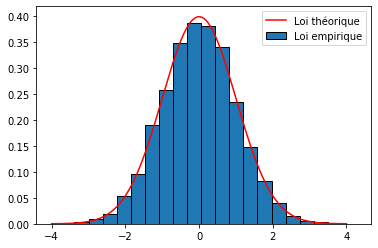

In [15]:
# loi théorique
x = np.linspace(-4, 4, 1000)
yTh = sps.norm.pdf(x)
plt.plot(x, yTh, 'r', label='Loi théorique')

# loi empirique
N = int(1e4)
nbCl = int(N**(1/3))
yEmp = npr.randn(N)
plt.hist(yEmp, bins=nbCl, normed=1, edgecolor='black', label='Loi empirique')

plt.legend(loc='best')
plt.show()

## Théorème Central Limite

Nous savons maintenant (LFGN) que la moyenne empirique (pour $n$ assez grand) est "proche" de la moyenne théorique, mais comment se distribue-t-elle ? <br>
Autrement dit, si l'on calcule plusieurs moyennes empiriques (pour un même $n$ assez grand), comment se répartissent-elles autour de la moyenne théorique ?<br>
C'est le Théorème Central Limite (TCL) qui répond à cette question.

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
**Théorème (TCL) :**<br>

Soit $X_i$ des v.a. indépendantes et de même loi (éventuellement inconnue) d'espérance $m$ et d'écart-type $\sigma$.<br />
Alors, la moyenne empirique centrée réduite converge (en loi) vers la gaussienne centrée réduite :
$$\displaystyle\frac{\bar X_n-m}{\frac{\sigma}{\sqrt{n}}}\xrightarrow[n\to +\infty]{\mathcal L}\mathcal N(0,1)$$

*En pratique, on considère que la loi de la moyenne empirique centrée-réduite est proche de la loi normale centrée-réduite.*

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------

> Ecrire un script permettant d'illustrer ce théorème de la manière suivante, par exemple avec les $X_i$ de loi uniforme sur [0,1[.
<img src="TCL.png" width="400">

/home/rozenn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


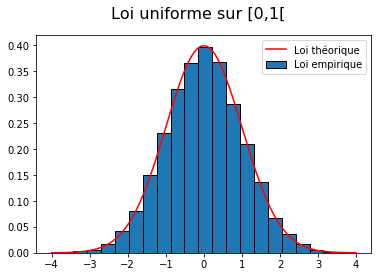

In [38]:
plt.suptitle('Loi uniforme sur [0,1[', fontsize=16)

# loi théorique
x = np.linspace(-4, 4, 1000)
yTh = sps.norm.pdf(x)
plt.plot(x, yTh, 'r', label='Loi théorique')

# loi empirique
N = int(1e4)
tab=N*[0] #tableau de taille N avec des moyennes
i=0
while(i<N):
    j=0
    tabrand= N*[0]
    while (j<N):
        tabrand[j] = npr.rand()
        j= j+1
    moyenne = sum(tabrand)/N
    esperance = (0+1)/2
    ecarttype =  np.sqrt(1/12)
    tab[i] = (moyenne - esperance)/(ecarttype/np.sqrt(N))
    i=i+1
nbCl = int(N**(1/3))
yEmp =  tab
plt.hist(yEmp, bins=nbCl, normed=1, edgecolor='black', label='Loi empirique')

plt.legend(loc='best')
plt.show()


**Remarque :** le TCL est à la base de la statistique inférentielle qui sera présentée en M4202C dans le parcours "développeurs d'applications"... 